In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/juhimishra/Downloads/dataset1-master 2/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


as per the above data we can conclude that this data belongs to classification problem as rings are here not a continous data 
moreover sex column is categorical column in which male, female and third is I mentioned which we need to drop. 

## EDA

In [3]:
data.shape

(4177, 9)

total no of rows in this data are 4177 and colun = 9

In [4]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [5]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [6]:
df = data.replace('I',np.NaN)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,NaN,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df['Sex']=df['Sex'].fillna(df['Sex'].mode()[0])

In [8]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,M,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Summary of obeservations from above stats data are :
1. There are no missing data
2. with the help of this describe method we can observe that there are lot many skewed data as mean and std is having
   less difference and quantile are also not having high difference between them.

In [11]:
df.isna().sum().to_frame(name = 'Missing Values')

,Missing Values
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


there is no missing value in any of the column

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [13]:
df[['Sex']]= ord_enc.fit_transform(df[['Sex']])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
df.rename(columns={'Whole weight':'Whole_weight','Shucked weight':'Shucked_weight','Viscera weight':'Viscera_weight',
                  'Shell weight':'Shell_weight'},inplace = True)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


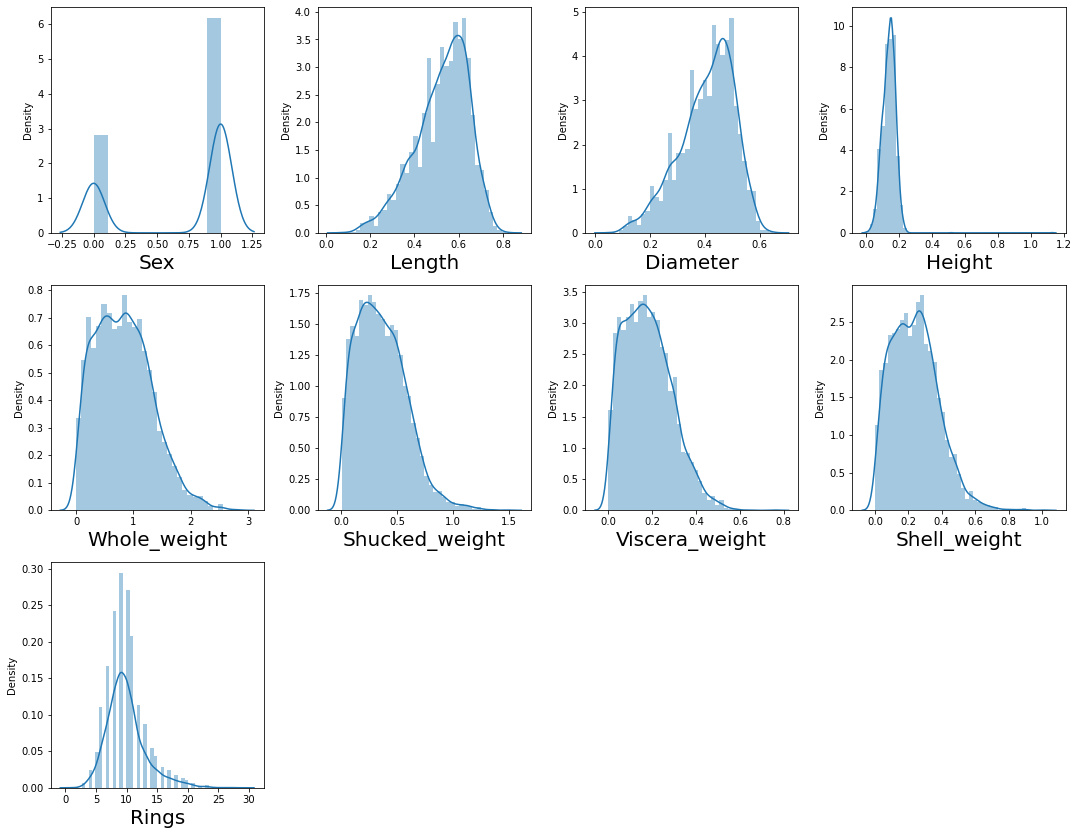

In [15]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [16]:
df.skew()

Sex              -0.807302
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Rings             1.114102
dtype: float64

In [17]:
x_features = ['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']

In [21]:
from sklearn.preprocessing import PowerTransformer

In [27]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [28]:
df[x_features] = scaler.fit_transform(df[x_features].values)

In [30]:
df[x_features]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [31]:
df.skew()

Sex              -0.807302
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole_weight     -0.003980
Shucked_weight    0.027351
Viscera_weight    0.039780
Shell_weight      0.023390
Rings             1.114102
dtype: float64

In [32]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [33]:
x = df.drop(columns=['Rings'])
y = df['Rings']

In [46]:
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.0,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,0.0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.0,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,1.0,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,0.0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.0,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.0,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [47]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [38]:
x.shape

(4177, 8)

In [39]:
y.shape

(4177,)

In [41]:
df.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.306880,-0.316301,-0.314483,-0.315947,-0.286905,-0.325348,-0.321352,-0.250279
Length,-0.306880,1.000000,0.982954,0.874099,0.972757,0.956482,0.953238,0.946681,0.537096
Diameter,-0.316301,0.982954,1.000000,0.880744,0.971244,0.949864,0.948235,0.953241,0.558409
Height,-0.314483,0.874099,0.880744,1.000000,0.893844,0.857753,0.875732,0.894305,0.598130
Whole_weight,-0.315947,0.972757,0.971244,0.893844,1.000000,0.977466,0.974887,0.968830,0.566749
Shucked_weight,-0.286905,0.956482,0.949864,0.857753,0.977466,1.000000,0.948587,0.917084,0.463989
Viscera_weight,-0.325348,0.953238,0.948235,0.875732,0.974887,0.948587,1.000000,0.935002,0.535984
Shell_weight,-0.321352,0.946681,0.953241,0.894305,0.968830,0.917084,0.935002,1.000000,0.641506
Rings,-0.250279,0.537096,0.558409,0.598130,0.566749,0.463989,0.535984,0.641506,1.000000


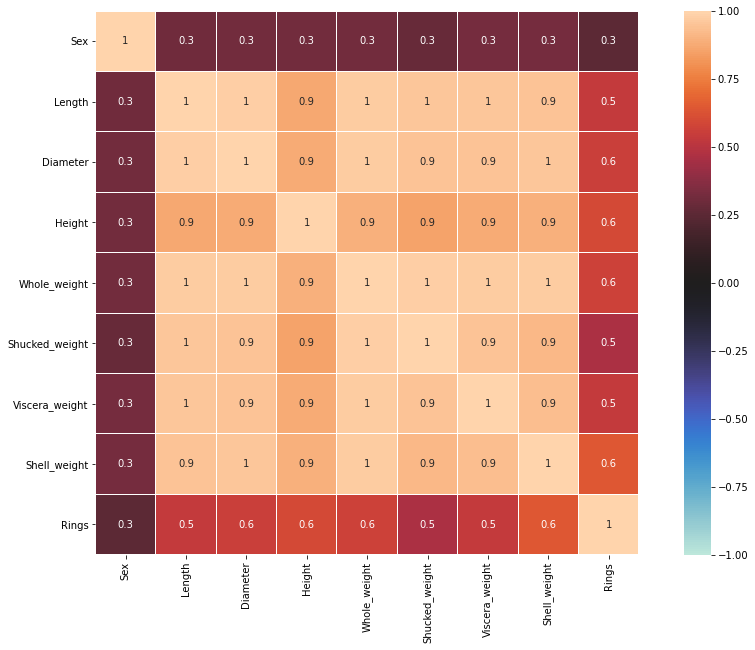

In [42]:
# Checking correlation with the help of heatmap
corr = df.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [48]:
x1,y1 = sm.fit_resample(x,y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6